# Run Correlation-Based Analyses

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a correlation between a dependent variable and an independent variable is statistically significant using permutation analysis. 

Further, follow this up with a contrast analysis which sees which categorical variables have significantly different correlations from each other. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.csv'

In [3]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/final/figure_three/base_analyses'

In [4]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Standardized_Subiculum_Total,Disease,Cohort,City,Inclusion_Cohort,Age_Group,Age_And_Disease,Subiculum_Group,Age_Disease_and_Cohort,Subiculum_Group_By_Inflection
0,101,62.0,-0.392857,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,-1.895022,...,1.789087,Alzheimer,1,Toronto,1,young,Alzheimer_young,low,Alzheimer_young_Toronto,Low
1,102,77.0,-0.666667,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,-1.909919,...,-1.093456,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
2,103,76.0,-1.447368,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,-0.803738,...,0.143505,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
3,104,65.0,-2.372549,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,-1.401520,...,0.126248,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
4,105,50.0,-0.192982,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,-1.401705,...,0.144737,Alzheimer,1,Toronto,1,young,Alzheimer_young,low,Alzheimer_young_Toronto,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,51,68.0,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,17,Boston,15,young,Parkinson_young,high,Parkinson_young_Boston,High
102,52,53.0,NaN,NaN,NaN,-1.320000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,18,Boston,16,young,Parkinson_young,low,Parkinson_young_Boston,Low
103,53,59.0,NaN,NaN,NaN,1.260000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,19,Boston,17,young,Parkinson_young,high,Parkinson_young_Boston,High
104,55,62.0,NaN,NaN,NaN,1.210000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,20,Boston,18,young,Parkinson_young,high,Parkinson_young_Boston,High


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [5]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection'],
      dtype='object')

In [6]:
drop_list = ['Z_Scored_Percent_Cognitive_Improvement']

In [7]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Standardized_Subiculum_Total,Disease,Cohort,City,Inclusion_Cohort,Age_Group,Age_And_Disease,Subiculum_Group,Age_Disease_and_Cohort,Subiculum_Group_By_Inflection
0,101,62.0,-0.392857,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,-1.895022,...,1.789087,Alzheimer,1,Toronto,1,young,Alzheimer_young,low,Alzheimer_young_Toronto,Low
1,102,77.0,-0.666667,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,-1.909919,...,-1.093456,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
2,103,76.0,-1.447368,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,-0.803738,...,0.143505,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
3,104,65.0,-2.372549,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,-1.401520,...,0.126248,Alzheimer,1,Toronto,1,old,Alzheimer_old,low,Alzheimer_old_Toronto,Low
4,105,50.0,-0.192982,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,-1.401705,...,0.144737,Alzheimer,1,Toronto,1,young,Alzheimer_young,low,Alzheimer_young_Toronto,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,42,63.0,0.000000,0.000000,NaN,-0.574000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,9,Boston,7,young,Parkinson_young,low,Parkinson_young_Boston,Low
96,45,60.0,0.000000,0.000000,NaN,0.190000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,12,Boston,10,young,Parkinson_young,high,Parkinson_young_Boston,High
98,48,73.0,-0.500000,0.500000,NaN,0.390000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,14,Boston,12,young,Parkinson_young,high,Parkinson_young_Boston,High
99,49,68.0,0.000000,0.000000,NaN,-0.756000,NaN,NaN,NaN,NaN,...,NaN,Parkinson,15,Boston,13,young,Parkinson_young,low,Parkinson_young_Boston,Low


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [8]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 'Boston'  # The value to compare against

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Standardized_Subiculum_Total,Disease,Cohort,City,Inclusion_Cohort,Age_Group,Age_And_Disease,Subiculum_Group,Age_Disease_and_Cohort,Subiculum_Group_By_Inflection
80,11,65.0,-0.25,0.25,0.0,0.0987,13.2,NaN,NaN,NaN,...,NaN,Parkinson,3,Boston,1,young,Parkinson_young,high,Parkinson_young_Boston,High
82,15,69.0,0.00,0.00,0.0,0.1170,27.5,NaN,NaN,NaN,...,NaN,Parkinson,3,Boston,1,young,Parkinson_young,high,Parkinson_young_Boston,High
83,16,67.0,0.00,0.00,0.0,-0.1010,20.8,NaN,NaN,NaN,...,NaN,Parkinson,3,Boston,1,young,Parkinson_young,low,Parkinson_young_Boston,Low
84,19,62.0,0.00,0.00,0.0,-1.8100,29.6,NaN,NaN,NaN,...,NaN,Parkinson,3,Boston,1,old,Parkinson_old,low,Parkinson_old_Boston,Low
85,21,68.0,-0.25,0.25,0.0,-1.0600,24.2,NaN,NaN,NaN,...,NaN,Parkinson,3,Boston,1,young,Parkinson_young,low,Parkinson_young_Boston,Low
86,24,48.0,0.25,-0.25,-0.5,-0.3380,25.3,NaN,NaN,NaN,...,NaN,Parkinson,3,Boston,1,old,Parkinson_old,low,Parkinson_old_Boston,Low
88,33,62.0,0.00,0.00,NaN,0.7900,NaN,NaN,NaN,NaN,...,NaN,Parkinson,4,Boston,2,young,Parkinson_young,high,Parkinson_young_Boston,High
89,35,56.0,-0.50,0.50,NaN,0.3710,NaN,NaN,NaN,NaN,...,NaN,Parkinson,5,Boston,3,young,Parkinson_young,high,Parkinson_young_Boston,High
90,36,60.0,0.00,0.00,NaN,-0.4290,NaN,NaN,NaN,NaN,...,NaN,Parkinson,6,Boston,4,young,Parkinson_young,low,Parkinson_young_Boston,Low
91,39,63.0,0.00,0.00,NaN,-0.1190,NaN,NaN,NaN,NaN,...,NaN,Parkinson,7,Boston,5,young,Parkinson_young,low,Parkinson_young_Boston,Low


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [10]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [11]:
#Standardize the data
import numpy as np

preserved_df = data_df.copy()

# Select the columns to be standardized
for col in data_df.columns:
    if col not in cols_not_to_standardize:
        try:
            data_df[col] = (data_df[col] - np.mean(data_df[col])) / np.std(data_df[col])
            # scaler.fit_transform(data_df[col])
        # cols_to_standardize = [col for col in data_df.columns if col not in cols_not_to_standardize]
        except:
            print('Unable to standardize column.')
    
# Standardize
data_df

Unable to standardize column.
Unable to standardize column.
Unable to standardize column.
Unable to standardize column.
Unable to standardize column.
Unable to standardize column.


,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Disease,Cohort,City,Inclusion_Cohort,Age_Group,Age_And_Disease,Subiculum_Group,Age_Disease_and_Cohort
80,-1.652802,65.0,-0.855337,0.855337,0.447214,0.111202,-1.920852,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,high,Parkinson_young_Boston
82,-1.353144,69.0,0.197386,-0.197386,0.447214,0.132081,0.763335,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,high,Parkinson_young_Boston
83,-1.278229,67.0,0.197386,-0.197386,0.447214,-0.116636,-0.494291,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,low,Parkinson_young_Boston
84,-1.053486,62.0,0.197386,-0.197386,0.447214,-2.066439,1.157517,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,old,Parkinson_old,low,Parkinson_old_Boston
85,-0.903657,68.0,-0.855337,0.855337,0.447214,-1.210762,0.143907,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,low,Parkinson_young_Boston
86,-0.678913,48.0,1.250108,-1.250108,-2.236068,-0.387030,0.350383,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,old,Parkinson_old,low,Parkinson_old_Boston
88,-0.004682,62.0,0.197386,-0.197386,NaN,0.899908,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.651127,Boston,-0.651127,young,Parkinson_young,high,Parkinson_young_Boston
89,0.145147,56.0,-1.908060,1.908060,NaN,0.421870,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.461708,Boston,-0.461708,young,Parkinson_young,high,Parkinson_young_Boston
90,0.220061,60.0,0.197386,-0.197386,NaN,-0.490852,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.272289,Boston,-0.272289,young,Parkinson_young,low,Parkinson_young_Boston
91,0.444805,63.0,0.197386,-0.197386,NaN,-0.137172,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.082871,Boston,-0.082871,young,Parkinson_young,low,Parkinson_young_Boston


In [12]:
data_df.describe()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Total,Standardized_Age,Standardized_Percent_Improvement,Standardized_Subiculum_Connectivity,Standardized_Subiculum_Grey_Matter,Standardized_Subiculum_White_Matter,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Cohort,Inclusion_Cohort
count,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,6.000000,16.000000,6.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000e+01,1.600000e+01
mean,5.551115e-17,63.500000,-1.387779e-17,1.387779e-17,0.000000,0.000000,-7.031412e-16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.775558e-17,2.775558e-17
std,1.032796e+00,7.099296,1.032796e+00,1.032796e+00,1.095445,1.032796,1.095445e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032796e+00,1.032796e+00
min,-1.652802e+00,48.000000,-1.908060e+00,-2.302831e+00,-2.236068,-2.066439,-1.920852e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.405458e-01,-8.405458e-01
25%,-9.411140e-01,60.000000,-6.579517e-02,-1.973855e-01,0.447214,-0.532210,-3.347413e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.405458e-01,-8.405458e-01
50%,1.826042e-01,63.000000,1.973855e-01,-1.973855e-01,0.447214,-0.002717,2.471455e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.669989e-01,-3.669989e-01
75%,7.257346e-01,68.000000,1.973855e-01,6.579517e-02,0.447214,0.427289,6.600974e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.380309e-01,4.380309e-01
max,1.718352e+00,77.000000,2.302831e+00,1.908060e+00,0.447214,2.371673,1.157517e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.568992e+00,2.568992e+00


# 02 - Perform Basic Correlation

In [10]:
import pandas as pd
import os 
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, kendalltau
from natsort import index_natsorted

# Correcting the function to remove natural sorting and ensure DataFrame is passed

def generate_scatterplot(dataframe, data_dict, columns_per_row=4, x_label='xlabel', y_label='ylabel', correlation='pearson', palette='Greys', out_dir=None):
    '''
    Generate scatterplots with specified correlation coefficient annotated.

    :param dataframe: DataFrame containing the data
    :param data_dict: Dictionary where key is the dependent variable name, and value is a list of independent variable names
    :param columns_per_row: Number of columns per row in the facet plot
    :param x_label: Label for the x-axis
    :param y_label: Label for the y-axis
    :param correlation: method of correlation ('pearson', 'spearman', 'kendall')
    :return: Facet plot
    '''
    sns.set_style('white')
    sns.set_palette(palette, 1, desat=1)
    
    for dependent_var, independent_vars in data_dict.items():
        # Melt the DataFrame for each dependent variable
        melted_df = pd.melt(dataframe, id_vars=[dependent_var], value_vars=independent_vars,
                            var_name='independent_variable_name', value_name='independent_variable_units')

        # Sort the DataFrame
        melted_df = melted_df.sort_values(by='independent_variable_name')

        # Begin plotting
        facet_plot = sns.lmplot(y=dependent_var, x='independent_variable_units', data=melted_df,
                                col='independent_variable_name', truncate=False, col_wrap=columns_per_row,
                                facet_kws=dict(sharex=False, sharey=True))

        # Calculate correlation for each cluster
        grouped_df = melted_df.groupby('independent_variable_name')
        
        if correlation == 'pearson':
            result = grouped_df.apply(lambda x: pearsonr(x['independent_variable_units'], x[dependent_var]))
        elif correlation == 'spearman':
            result = grouped_df.apply(lambda x: spearmanr(x['independent_variable_units'], x[dependent_var]))
        elif correlation == 'kendall':
            result = grouped_df.apply(lambda x: kendalltau(x['independent_variable_units'], x[dependent_var]))
        else:
            raise ValueError(f'Correlation {correlation} not specified, please select "pearson", "kendall" or "spearman"')

        # Annotate with correlation
        for ax in facet_plot.axes:
            # Get the title of the current subplot
            region = ax.get_title().split("=")[-1].strip()
            # Get the corresponding r, p values from the result
            r, p = result[region]
            ax.set_title(region)
            ax.annotate(f"r = {r:.2f}, p = {p:.5f}", xy=(.5, 1.0), xycoords='axes fraction',
                        xytext=(0, 0), textcoords='offset points', ha='center', va='top',
                        bbox=dict(boxstyle='round,pad=0.0', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
            
        facet_plot.set_xlabels(x_label)
        facet_plot.set_ylabels(y_label)
        
        
        os.makedirs(os.path.join(out_dir, 'scatterplot_figures'), exist_ok=True)
        facet_plot.savefig(os.path.join(out_dir, f'scatterplot_figures/{x_label}_to_{y_label}.png'))
        facet_plot.savefig(os.path.join(out_dir, f'scatterplot_figures/{x_label}_to_{y_label}.svg'))
        print('Figure saved to: ', (os.path.join(out_dir, f'scatterplot_figures/{x_label}_to_{y_label}')))
        return facet_plot


Define Variables to Correlate
- 

In [11]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection'],
      dtype='object')

In [12]:
# Variables to Correlate
dependent_variable = 'Z_Scored_Percent_Cognitive_Improvement'
independent_variable_list = [
 'Z_Scored_Subiculum_Connectivity']

Choose Correlation Method
- Options: 'spearman', 'pearson', 'kendall'

In [13]:
# Correlation Method
correlation = 'spearman'

Define plot Labels

In [14]:
# Axis Labels
x_label = 'Subiculum Connectivity'
y_label = 'Cognitive Improvement (MDRS)'

Run the Correlation

Figure saved to:  /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/final/figure_three/base_analyses/scatterplot_figures/Subiculum Connectivity_to_Cognitive Improvement (MDRS)


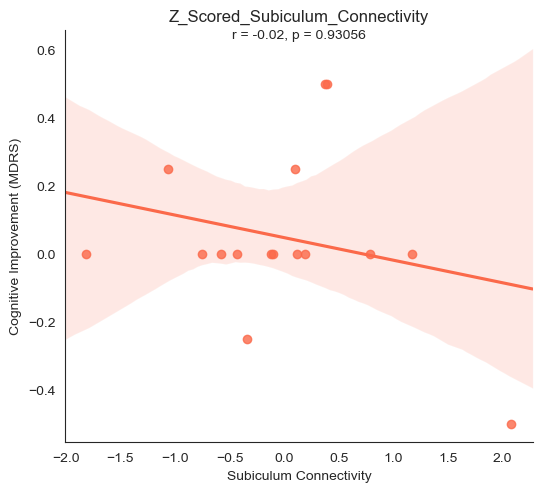

In [15]:
plot = generate_scatterplot(dataframe=data_df, 
                     data_dict={dependent_variable:independent_variable_list}, 
                     x_label=x_label, 
                     y_label=y_label,
                     correlation=correlation,
                     palette='Reds',
                     out_dir=out_dir)

# 03 - Run ANCOVA-Style Analysis Using Correlation
- AKA a 'Delta-R Analysis'

In [16]:
from statannotations.Annotator import Annotator
import pandas as pd
import numpy as np
from tqdm import tqdm
import itertools
import random
import matplotlib.pyplot as plt
import seaborn as sns

class ANCOVACorrelation:
    def __init__(self, df, dependent_variable, independent_variable, categorical_variable, spearman=False, out_dir=None):
        self.df = df
        self.dependent_variable = dependent_variable
        self.independent_variable = independent_variable
        self.categorical_variable = categorical_variable
        self.out_dir = out_dir
        # Initialize a dictionary to store dataframes for each category
        self.category_dataframes = {}
        
        # Initialize a dictionary to store observed correlations
        self.observed_correlations = {}
        
        # Call the segregator function to split the data
        self.segregate_data()
        self.spearman=spearman
    
    def segregate_data(self):
        # Group the data by unique values of the categorical variable
        unique_categories = self.df[self.categorical_variable].unique()
        
        # Create separate dataframes for each category
        for category in unique_categories:
            self.category_dataframes[category] = self.df[self.df[self.categorical_variable] == category]
    
    def calculate_correlation(self, category):
        # Calculate the correlation between independent and dependent variables for a given category
        category_df = self.category_dataframes.get(category)
        if category_df is not None:
            if self.spearman:
                correlation = category_df[self.independent_variable].corr(category_df[self.dependent_variable], method='spearman')
            else:
                correlation = category_df[self.independent_variable].corr(category_df[self.dependent_variable])
            self.observed_correlations[category] = correlation
        else:
            print(f"Category '{category}' not found in the data.")

            
    def calculate_observed_r_values(self):
        # Calculate observed r values for each category and store them
        self.observed_correlations = {}
        for category in self.category_dataframes.keys():
            correlation = self.calculate_correlation(category)
            if correlation is not None:
                self.observed_correlations[category] = correlation

    def permute_and_calculate_correlations(self, n_permutations=10000):
        # Initialize a dictionary to store permuted correlations for each category
        self.permuted_correlations = {category: [] for category in self.category_dataframes.keys()}

        for _ in tqdm(range(n_permutations), desc="Permutations"):
            # Create a copy of the original data to permute
            permuted_data = self.df.copy()

            # Loop through each category's dataframe
            for category, category_df in self.category_dataframes.items():
                # Permute the outcomes (dependent variable) within the category's dataframe
                category_outcomes = category_df[self.dependent_variable].values
                random.shuffle(category_outcomes)
                permuted_data.loc[category_df.index, self.dependent_variable] = category_outcomes

                # Calculate and store the correlation with the independent variable
                correlation = category_df[self.independent_variable].corr(permuted_data.loc[category_df.index, self.dependent_variable])
                self.permuted_correlations[category].append(correlation)
                
    def calculate_p_values(self):
        '''
        This calculate a two-tailed p-value.
        '''
        # Initialize a dictionary to store p-values for each category
        self.p_values = {category: None for category in self.category_dataframes.keys()}

        for category in self.category_dataframes.keys():
            observed_val = self.observed_correlations[category]
            permuted_dist = self.permuted_correlations[category]

            # Calculate the p-value
            p_value = np.mean(np.array(np.abs(permuted_dist)) > np.abs(observed_val))

            self.p_values[category] = p_value
            
    def calculate_delta_r(self):
        # Initialize a dictionary to store Delta-R values and their significance for each category combination
        self.delta_r_values = {}
        
        # Get all unique combinations of categories
        category_combinations = list(itertools.combinations(self.category_dataframes.keys(), 2))

        for category1, category2 in category_combinations:
            observed_val1 = self.observed_correlations[category1]
            observed_val2 = self.observed_correlations[category2]
            observed_delta_r = observed_val1 - observed_val2

            # Get the permuted distributions for both categories
            permuted_dist1 = self.permuted_correlations[category1]
            permuted_dist2 = self.permuted_correlations[category2]

            delta_r = observed_val1 - observed_val2
            delta_r_permuted = np.array(permuted_dist1) - np.array(permuted_dist2)

            # Calculate the significance using a two-tailed test
            p_value = np.mean(np.abs(delta_r_permuted) > np.abs(delta_r))
            # Store the Delta-R value and its significance
            self.delta_r_values[(category1, category2)] = {
                'delta_r': delta_r,
                'p_value': p_value
            }

    def plot_correlations(self):
        # Convert observed correlations data to a DataFrame
        observed_data = pd.DataFrame({
            'Category': self.observed_correlations.keys(),
            'Correlation': self.observed_correlations.values()
        })

        # Set style and increase font size
        sns.set_style("white")
        # sns.set(font_scale=1)

        # Create the bar plot using the observed data
        sns.barplot(x='Category', y='Correlation', data=observed_data, palette='tab10')
        sns.despine()
        # # Add p-value annotations using Annotator
        p_values = [self.delta_r_values[comb]['p_value'] for comb in self.delta_r_values]
        combinations = [f'{comb[0]} vs {comb[1]}' for comb in self.delta_r_values]
        data = pd.DataFrame({'Combination': combinations, 'p-value': p_values})
        # annotator = Annotator(ax=ax, data=data, x='Combination', y='p-value', loc='outside', fontsize=12)

        # Save the figure if out_dir is provided
        if self.out_dir:
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.png", bbox_inches='tight')
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.svg", bbox_inches='tight')
            print(f'Saved to {self.out_dir}/delta_correlation_plot.svg')

        # Show the plot
        plt.show()
        return observed_data, data
        
    def run(self):
        self.segregate_data()
        self.calculate_observed_r_values()
        self.permute_and_calculate_correlations()
        self.calculate_p_values()
        self.calculate_delta_r()
        single_data, delta_data = self.plot_correlations()
        return single_data, delta_data

    def create_combined_plot(self, group_variable, dependent_variable):
        sns.set()

        fig, ax = plt.subplots(nrows=len(self.df[group_variable].unique()), sharex=True)
        ax[-1].set_xlabel(dependent_variable)

        for i, group_val in enumerate(self.df[group_variable].unique()):
            group_data = self.df[self.df[group_variable] == group_val][dependent_variable]
            jittered_group_data = group_data + 0.1 * (2 * random.random() - 1)  # Add small vertical jitter
            ax[i].scatter(jittered_group_data, [0] * len(group_data))
            sns.kdeplot(group_data, ax=ax[i], shade=False, legend=False)
            ax[i].set_yticks([])
            ax[i].set_ylim(-0.01)
            ax[i].set_ylabel(f'{group_variable} ' + str(group_val))

        plt.show()
        
    def plot_correlations_with_lmplot(self, palette='Tab10'):
        # Using seaborn's lmplot to plot linear regression lines for each category
        if self.spearman:
            print('Have rank-transformed data for visualization of Spearman correlation.')
            self.df = self.df.rank()
        lm = sns.lmplot(x=self.independent_variable, y=self.dependent_variable, 
                        hue=self.categorical_variable, data=self.df, 
                        aspect=1.5, height=5, palette=palette, legend=False, ci=0)

        # Enhancements for better readability
        lm.set_xlabels(f"{self.independent_variable}")
        lm.set_ylabels(f"{self.dependent_variable}")
        plt.title("Correlation Split by Category")
        plt.legend()
        # Save the figure if out_dir is provided
        if self.out_dir:
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.png", bbox_inches='tight')
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.svg", bbox_inches='tight')
            print(f'Saved to {self.out_dir}/delta_correlation_plot.svg')
        plt.show()

In [17]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection'],
      dtype='object')

Enter Variables
- dependent_variable: the name of the dependent variable
- independent_variable: the name of the independent variable
- categorical_variable: the column containing categorical information. This may be strings or numbers. 

In [18]:
dependent_variable = 'Z_Scored_Percent_Cognitive_Improvement'
independent_variable = 'Subiculum_Connectivity'
categorical_variable = 'Age_Group'

Do You Want to Run A Spearman Correlation?

In [19]:
spearman = False

# 04 - Run the Correlational ANCOVA

In [20]:
delta_r = ANCOVACorrelation(df=data_df, dependent_variable=dependent_variable, independent_variable=independent_variable, categorical_variable=categorical_variable, out_dir=out_dir, spearman=spearman)

Permutations:   0%|          | 0/10000 [00:00<?, ?it/s]

Permutations: 100%|██████████| 10000/10000 [00:12<00:00, 827.53it/s]


Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/final/figure_three/base_analyses/delta_correlation_plot.svg


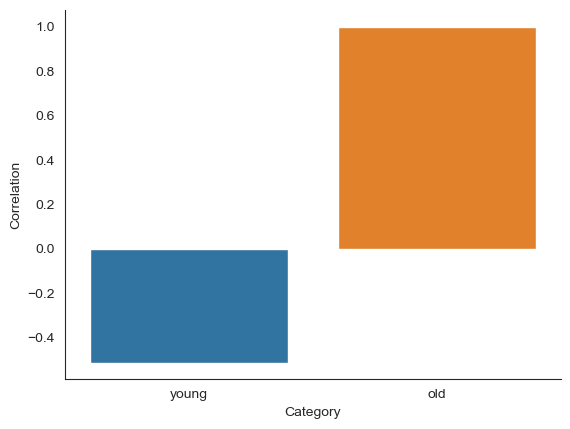

,Combination,p-value
0,young vs old,0.2091


In [21]:
single_data, delta_data = delta_r.run()
delta_data

Visualize Scatter

Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/final/figure_three/base_analyses/delta_correlation_plot.svg


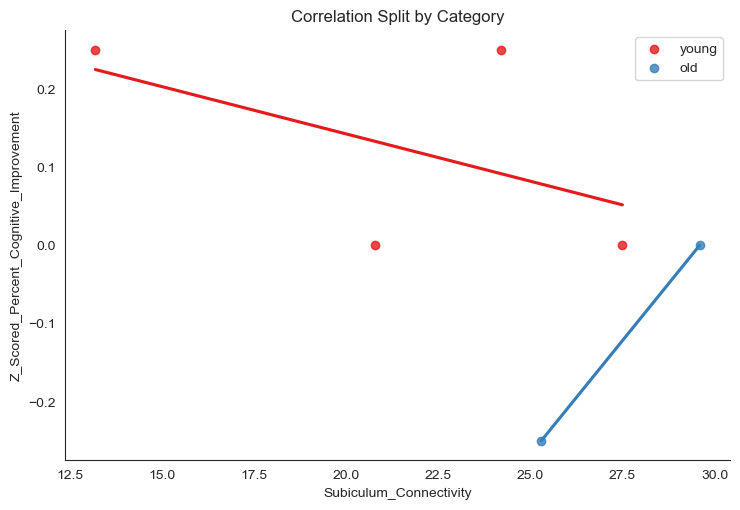

In [22]:
delta_r.plot_correlations_with_lmplot(palette='Set1')

In [224]:
single_data

,Category,Correlation
0,Alzheimer,0.167256
1,Parkinson,-0.384846


# 05 - Plot Additional Variables

In [16]:
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Disease,Cohort,City,Inclusion_Cohort,Age_Group,Age_And_Disease,Subiculum_Group,Age_Disease_and_Cohort
80,-1.652802,65.0,-0.855337,0.855337,0.447214,0.111202,-1.920852,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,high,Parkinson_young_Boston
82,-1.353144,69.0,0.197386,-0.197386,0.447214,0.132081,0.763335,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,high,Parkinson_young_Boston
83,-1.278229,67.0,0.197386,-0.197386,0.447214,-0.116636,-0.494291,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,low,Parkinson_young_Boston
84,-1.053486,62.0,0.197386,-0.197386,0.447214,-2.066439,1.157517,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,old,Parkinson_old,low,Parkinson_old_Boston
85,-0.903657,68.0,-0.855337,0.855337,0.447214,-1.210762,0.143907,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,young,Parkinson_young,low,Parkinson_young_Boston
86,-0.678913,48.0,1.250108,-1.250108,-2.236068,-0.387030,0.350383,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.840546,Boston,-0.840546,old,Parkinson_old,low,Parkinson_old_Boston
88,-0.004682,62.0,0.197386,-0.197386,NaN,0.899908,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.651127,Boston,-0.651127,young,Parkinson_young,high,Parkinson_young_Boston
89,0.145147,56.0,-1.908060,1.908060,NaN,0.421870,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.461708,Boston,-0.461708,young,Parkinson_young,high,Parkinson_young_Boston
90,0.220061,60.0,0.197386,-0.197386,NaN,-0.490852,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.272289,Boston,-0.272289,young,Parkinson_young,low,Parkinson_young_Boston
91,0.444805,63.0,0.197386,-0.197386,NaN,-0.137172,NaN,NaN,NaN,NaN,...,NaN,NaN,Parkinson,-0.082871,Boston,-0.082871,young,Parkinson_young,low,Parkinson_young_Boston


In [26]:
scatter_variable = 'Age'
categorical_variable = 'Disease'

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import os

def create_custom_stripplot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")

    # Get/set params for the color mapping
    vcenter = hue_change_value
    vmin, vmax = data[y_variable].min(), data[y_variable].max()
    normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
    colormap = cm.redblue

    # Create a scatter plot with custom color mapping
    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(
        x=x_variable,
        y=y_variable,
        data=data,
        c=data[y_variable],
        norm=normalize,
        cmap=colormap,
    )
    ax.axhline(y=vcenter, color='gray', linestyle='--')

    # Tweak the points to mimic `sns.stripplot`
    pts = ax.collections[0]
    pts.set_offsets(pts.get_offsets() + np.c_[np.random.uniform(-0.1, 0.1, len(data)), np.zeros(len(data))])
    ax.margins(x=0.15)

    scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappable.set_array(data[y_variable])

    # Add a colorbar
    cbar = plt.colorbar(scalarmappable, ax=ax)
    cbar.set_label(y_variable)

    plt.title(f'Strip Plot of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/strip_plot.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/strip_plot.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/strip_plot.svg')
    else:
        plt.show()

# Example usage:
create_custom_stripplot(data_df, 'Disease', 'Age', 65, out_dir=out_dir)


AttributeError: module 'matplotlib.cm' has no attribute 'redblue'

Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/final/figure_one/distribution_violin.svg


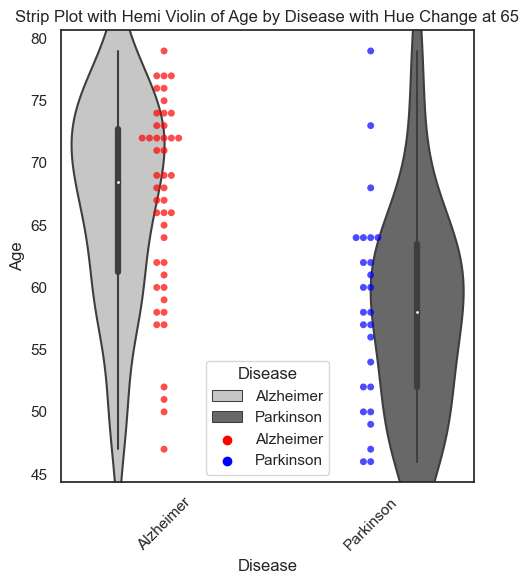

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def create_distribution_violin_plot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")
    plt.figure(figsize=(5, 6))

    # Create the violin plot with specified parameters
    sns.violinplot(data=data, x=x_variable, y=y_variable, hue=x_variable, width=.9, cut=2, split=False, inner='box', palette='Greys', alpha=0.1)

    # Create the swarm plot on top of the violin plot
    sns.swarmplot(data=data, x=x_variable, y=y_variable, hue=x_variable, palette=['red', 'blue'], alpha=0.7)

    plt.title(f'Strip Plot with Hemi Violin of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/distribution_violin.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/distribution_violin.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/distribution_violin.svg')
    else:
        plt.show()

# Example usage:
create_distribution_violin_plot(data_df, 'Disease', 'Age', 65, out_dir=out_dir)
